# Black-Scholes Formula

## Geometric Brownian Motion

As previously stated **asset prices follow a random walk**. Even though this model captures the essence of the unpredictable movements of an asset, this model consists of a series of steps in discrete-time. This makes it insufficient for the rigorous demands of derivative pricing, which requires a continuous framework.

**The mathematical bridge from a discrete random walk to a continuos-time process is the concept of Brownian Motion ($W_t$).** Standard Brownian Motion is a stochastic proces characterized by three key properties:

- It starts at zero, $W_0 = 0$.
- It has independent increments, which means that the change in the process over any time interval has no bearing on what happened before.
- The increments are normally distributed, with a zero mean and a variance equal to the length of the time interval, $W_{t+s} - W=s \sim N(0, t)$.

Even though, it comes close to a proper model for an asset price, there is still one issue. **This brownian motion model does not guarantee a positive outcome.** Since the increments are normally distributed around 0, the variable could become negative, which is impossible for a limited liability, such as a stock.

Therefore, the Black-Scholes model proposes that the movements of an asset's price can be modeled with a [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) ($S_t$). While a standard Brownian Motion has random increments being added at each step, **a Geometric Brownian Motion has a random growth being multiplied at each step**. The key properties of a Geometrical Brownian Motion are analogous to a standard Brownian Motion:

- It starts at a positive value, $S_0 > 0$.
- It has independent multiplying factors.
- The multiplying factors at each step are log-normally distributed.
- Geometric Brownian Motion processes can never become negative.

These properties align with the assumptions of a Black-Scholes model, making it suitable to describe the movement of the underlying asset.

The dynamics of a GBM are described by a [Stochastic Differential Equation](https://en.wikipedia.org/wiki/Stochastic_differential_equation) (SDE):

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

This equation is composed by two parts:

1. A deterministic component ($\mu S_t dt$), called "drift". This term represents the expected return of the asset over an infinitesimal time period $dt$. The constant $\mu$, also called percentage drift, is the annualized expected rate of return.
2. A stochastic component, $\sigma S_t dW_t$, called "diffusion" or "volatility" term. This term captures the random fluctuations of the asset price. The constant $\sigma$, also called percentage volatility, is the annualized standard deviation of the asset's returns.

## Itô's Lemma

**The Brownian Motion process, seen in asset's prices, is continuous everywhere but nowhere differentiable.** This is due to the fact the the curve is very erratic, with a "roughness" so extreme that at no point can a unique tangent line be drawn. This caveat makes it SDE impossible to be solved by calculus' conventional means. Still, through a technique using a Taylor series expansion of an option's value, the Japanese mathematician Kiyoshi Itô was able to **provide the complete differential for a stochastic function**.

Given the function for the price of an option $V(S, t)$, where $S$ represents the price of the underlying asset (which is a stochastic process) and $t$ the time, by Itô's lemma:

$$dV(S,t) = (\mu S_t \frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial ^ 2 V}{\partial S^2})dt + \sigma S_t \frac{\partial V}{\partial S} dW_t$$

## Black-Scholes Partial Differential Equation

Now that we have all the assumptions and the concepts from stochastic calculus, we can build the intuition behind the Black-Scholes Model equation. First, let's start with a hedged portfolio, with a self-financing strategy:

$$\Pi_t = x_t B_t + y_t S_t$$

where, in time $t$:
- $x_t$ are the units of cash invested in a cash account at a constant interest rate.
- $B_t$ is the formula for a continuously compounding interest rate, $B_t = e^{rt}$.
- $y_t$ are the units of the underlying asset.
- $S_t$ is the price of the underlying asset.

When we derive the function for the value of our portfolio, we get:

$$d\Pi_t = x_t dB_t + y_t dS_t$$

Using the SDE to describe a Geometric Brownian Motion:

$$d\Pi_t = r x_t B_t dt + y_t (\mu S_t d_t + \sigma S_t dW_t)$$
$$d\Pi_t = (r x_t B_t + y_t \mu S_t)dt + y_t \sigma S_t dW_t$$

We will build a portfolio that replicates the value of the option. This means we are looking to tune the variables $x_t$ and $y_t$, so that $\Pi_t = V_t$.

$$\Pi_t = V_t \rightarrow d\Pi_t = dv_t$$
$$\rightarrow (r x_t B_t + y_t \mu S_t)dt + y_t \sigma S_t dW_t = (\mu S_t \frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial ^ 2 V}{\partial S^2})dt + \sigma S_t \frac{\partial V}{\partial S} dW_t$$

After equating the common terms of the equation above:

$$y_t = \frac{\partial V}{\partial S}$$
$$rx_tB_t = \frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2}$$

Finally, we can input the two variables into our portfolio formula:

$$\Pi = V = \frac{\partial V}{\partial t}\frac{1}{r}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2}\frac{1}{r} + S_t\frac{\partial V}{\partial S}$$
$$\rightarrow \frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2\frac{\partial ^2 V}{\partial S^2} + rS_t\frac{\partial V}{\partial S} - rV = 0$$

The equation above is known as the [Black-Scholes Partial Differential Equation](https://en.wikipedia.org/wiki/Black–Scholes_equation) (PDE). **It describes the relationship that must hold at all times between an option's price, the underlying stock's price, time, volatility and the risk-free rate to prevent arbitrage opportunities.**

One major thing to point out is the complete absence of the drift percentage ($\mu$) in the final PDE. Even though it seems counter intuitive, **the annualized expected rate of return on the asset has no influence on the option's fair value**.

## Black-Scholes Formula

The solution to the Black-Scholes PDE is what is called the Black-Scholes Formula, a equation that provides the theoretical fair value of a European option. **To solve this PDE, boundary conditions must be provided**:

1. At the moment of expiration, the value of a call option is either 0, if the stock price falls lower than the strike price, or the stock price minus the strike price:
$$C(S, T) = max(S_t - K, 0)$$
2. If the stock price falls to zero, then the call option is worthless:
$$C(0, t) = 0\ for\ all\ t$$
3. As the stock price becomes too large, the probability of the option being exercised is close to 100%. In this case, the value of the option approaches the value of holding the stock minus the present value of paying the strike price:
$$C(S, t) \rightarrow S - Ke^{-r(T-t)}\ as\ S\rightarrow \infty$$

Surprisingly, before Fischer Black or Myron Scholes had this idea for an option pricing model, the Black-Scholes PDE had already been solved. The Black-Scholes PDE is a type of parabolic PDE that is mathematically analogous to the [heat diffusion equation](https://en.wikipedia.org/wiki/Heat_equation) in physics. Price volatility behaves similar to thermal diffusivity, and through some variable manipulations, it's possible to get to the heat diffusion equation.

The solution for a the Black-Scholes PDE gives us the price for a call option. While this solution, plus the concept of a [put-call parity](https://en.wikipedia.org/wiki/Put–call_parity) relationship, yields the price for a put option. The put-call parity is a principle in finance that states that the value of a portfolio consisting of a long call option and a risk-free bond, which will be worth the strike price at expiration date, is equal to the value of a portfolio containing a long put option and the underlying asset.

$$C(t) + K e^{-r(T-t)} = P(t) + S(t)$$

This idea is also based on the assumption of an efficient market, with no arbitrage opportunities. **As a result, the formulas for a call and a put option according to the Black-Scholes model are**:

$$C(S, t) = S_t\Phi(d_1) - e^{-r(T-t)}K\Phi (d_2)$$
$$P(S, t) = e^{-r(T-t)}K\Phi (-d_2) - S_t\Phi(-d_1)$$

where:

- $d_1 = \frac{log(\frac{S_t}{K}) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $\sigma$ is volatility or the annualized rate of return of the underlying stock.
- $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.
- $S_t$ is the stock price at time $t$.
- $r$ is the risk-free interest rate.
- $T$ is the option's expiration date.
- $K$ is the strike price of the option.

The $d_2$ term represents the probability that the option will expire in the money ($S_t \ge K$), which means that **$\Phi(d_2)$ gives the expected value of having to pay out the strike price for a call**. The component $d_1$ is a little more complex. **It calculates the conditional probability of the expected value in relation to its current spot price, given that the current spot price is greater than the strike price at maturity.**

**The first term of the call option ($S_t \Phi(d_1)$) calculates the risk adjusted probability of the option being exercised**, which occurs when the price of the underlying asset is greater than or equal to the option's strike price ($S_t \ge K$). **While the second term ($e^{-r(T-t)}K\Phi (d_2)$) expresses the inverse probability of the investor not exercising the option.** The component is a discounted strike price from the expiration date to the present time using risk-free rate. This can be seen as the opportunity cost of paying upfront fro the premium, instead of investing it at the risk-free rate.

### Cumulative Distribution Function (CDF)

**The [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of a variable $X$ evaluated at $x$ is the probability that $X$ will take a value less than or equal to $x$.** To understand it better we can plot a standard normal distribution curve using Python.

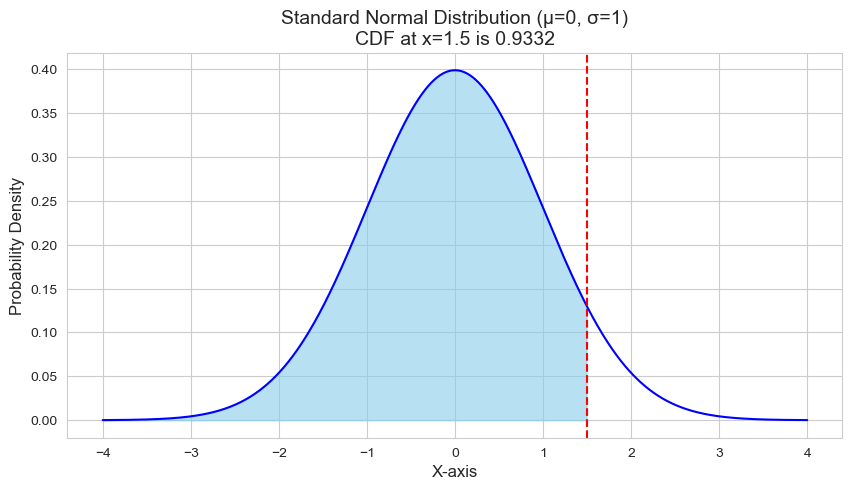

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Standard normal distribution parameters
mu = 0  # Mean
sigma = 1  # Standard Deviation

# Point at which to calculate the CDF
x_value = 1.5

# Create a range of x values for the plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the Probability Density Function (PDF) for these x values
pdf = norm.pdf(x, mu, sigma)

# Calculate the CDF for the x_value
cdf_value = norm.cdf(x_value, mu, sigma)

# Create plot
plt.figure(figsize=(10, 5))

# Plotting the PDF curve
plt.plot(x, pdf, 'blue', label='Standard Normal PDF')

# Filling the area underneath the PDF curve until the x_value
fill_mask = x <= x_value
plt.fill_between(x[fill_mask], pdf[fill_mask], color='skyblue', alpha=0.6, label=f'Area = CDF({x_value})')

plt.axvline(x_value, color='red', linestyle='--', label=f'x = {x_value}')

# Adding Title, Labels and Grid
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'Standard Normal Distribution (μ={mu}, σ={sigma})\nCDF at x={x_value} is {cdf_value:.4f}', fontsize=14)
plt.grid(True)

# Display Plot
plt.show()

The plot above shows the standard normal distribution PDF curve (blue) with a limit at the $x=1.5$ (red). The area underneath the PDF curve until the dashed red line is equal to the value of the CDF. So, in the example above $\Phi(1.5) = 0.9332$.